# Stock Price Prediction
inspired/base by https://www.youtube.com/watch?v=QIUxPv5PJOY&list=WL&index=7&t=225s

# Imports

In [9]:
import math
import pandas as pd
import numpy as np

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

#if you dont like the warnings
import warnings
warnings.filterwarnings("ignore")

print("Import successful")

ModuleNotFoundError: No module named 'tensorflow.python'

# Processing data
loading the data from yahoo

In [ ]:
df=web.DataReader("MS", data_source="yahoo", start="2010-01-01", end = "2020-08-01")
df

In [ ]:
df = df[["High", "Low", "Close", "Volume", "Adj Close", "Open"]] #reordering to make things easier
df

In [ ]:
dataSet=df.values #creates numpy array
print(type(dataSet))
TrainDataLen=math.ceil(len(dataSet)*.8)

In [ ]:
#creating dataframe for plotting(before scaling)
plotdata=df[0:TrainDataLen]  # only plot with train(as it is the data we should know)
plotdata["nextOpen"]=plotdata["Open"]
for i in range(1,TrainDataLen-1):#wrong for 1. and last but thats fine with me
         plotdata["nextOpen"][i]=plotdata["nextOpen"][i+1]

In [3]:
#scaling to (0,1)
scaler=MinMaxScaler(feature_range=(0,1))
scaledData=scaler.fit_transform(dataSet)

NameError: name 'dataSet' is not defined

In [4]:
#splitting the data in train and test
TrainData=scaledData[0:TrainDataLen]
TestData=scaledData[TrainDataLen -60: ]
TrainData[0]

NameError: name 'scaledData' is not defined

In [5]:
xTrain=[]#past x days
yTrain=[]#prediction target

for i in range(60, len(TrainData)): #give 60 days of data=> predict 61th day
    xTrain.append(TrainData[i-60:i])
    yTrain.append(TrainData[i, 5])
    
xTest=[]
yTest=[]
for i in range(60, len(TestData)): #give 60 days of data=> predict 61th day
    xTest.append(TestData[i-60:i])
    yTest.append(TrainData[i, 5])
    
xTrain, yTrain=np.array(xTrain), np.array(yTrain)    
xTest, yTest=np.array(xTest), np.array(yTest)

print("xTrain Type:",type(xTrain), "\t xTest Type:",type(xTest),
      "\tyTrain Type:",type(yTrain[0]),"\tyTest Type:",type(yTest[0]),)
print("xTrain Len:",len(xTrain[0]), "\t xTest Len:",len(xTest[0])) #=60* 6 attr

NameError: name 'TrainData' is not defined

In [9]:
xTrain.shape

(2071, 60, 6)

In [10]:
xTest.shape

(532, 60, 6)

In [11]:
# #the lstm model expects 3 dim  but xtrain has only 2
# xTrain=np.reshape(xTrain,(xTrain.shape[0], xTrain.shape[1], 1))

# Plot

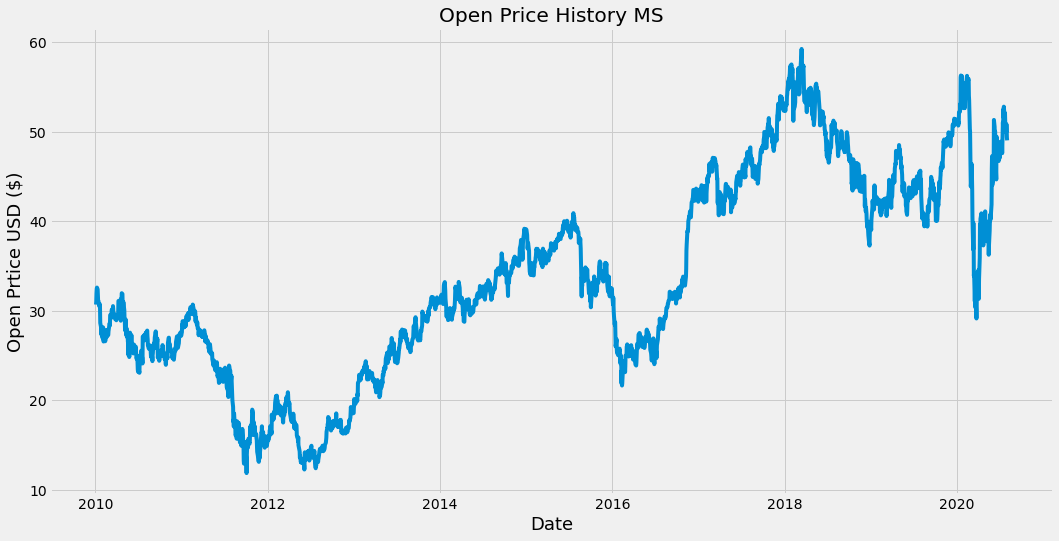

In [12]:
plt.figure(figsize=(16,8))
plt.title("Open Price History MS")
plt.plot(df["Open"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Open Prtice USD ($)", fontsize=18)
plt.show()  #useless

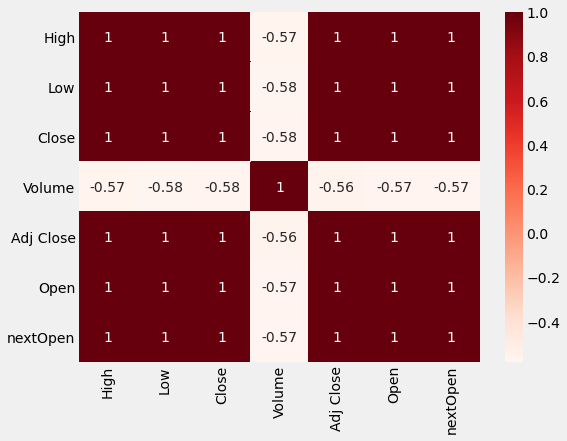

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(plotdata.corr(),annot=True,cmap='Reds')
 #obviously the values correlate (but to confirm)

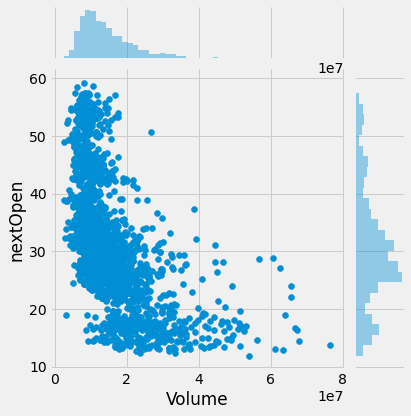

In [14]:
sns.jointplot(x="Volume", y="nextOpen", data=plotdata)

# Model
LSTM-NN with 2 hidden layers <br>
"return_sequences: Boolean. Whether to return the last output. in the output sequence, or the full sequence. Default: False." https://keras.io/api/layers/recurrent_layers/lstm/

In [1]:
model=Sequential()
Neurons1=128
Neurons2=50 #more did not rly improve the results
model.add(LSTM(Neurons1,return_sequences=True, input_shape=xTrain[0].shape))# , input_shape=(xTrain.shape[1],1)
model.add(LSTM(Neurons2,return_sequences=False))
model.add(Dense(25, activation="relu"))
model.add(Dense(1))
model.compile(optimizer="adam", loss="MSE", metrics=["acc"])
model.summary()

NameError: name 'Sequential' is not defined

# Training

In [16]:
try:
    # uncomment to train 
    model=keras.models.load_model("MS1.h5")
    print("Trainings data found")
except:
    
    print("training")
    model.fit(xTrain, yTrain, batch_size=1, epochs=10)
    model.save("MS1.h5")

training
Epoch 1/10
2071/2071 [==============================] - 56s 27ms/step - loss: 0.0014
Epoch 2/10
2071/2071 [==============================] - 55s 27ms/step - loss: 5.4439e-04
Epoch 3/10
2071/2071 [==============================] - 53s 26ms/step - loss: 2.9465e-04
Epoch 4/10
2071/2071 [==============================] - 51s 25ms/step - loss: 2.4775e-04
Epoch 5/10
2071/2071 [==============================] - 52s 25ms/step - loss: 2.3984e-04
Epoch 6/10
2071/2071 [==============================] - 53s 26ms/step - loss: 1.8998e-04
Epoch 7/10
2071/2071 [==============================] - 53s 26ms/step - loss: 2.0235e-04
Epoch 8/10
2071/2071 [==============================] - 54s 26ms/step - loss: 1.9392e-04
Epoch 9/10
2071/2071 [==============================] - 50s 24ms/step - loss: 1.7618e-04
Epoch 10/10
2071/2071 [==============================] - 48s 23ms/step - loss: 1.6997e-04


# Predicitions

In [17]:
#get the real values
predictions = model.predict(xTest)
#scaler=MinMaxScaler(feature_range=(0,1)) #already defined above
#scaled = scaler.fit(predictions)
#predictions = scaler.inverse_transform(predictions) # does not work because input != input we scaled (scaled 6 cols)
#predictions


#inserting new vals in xtest just to inversscale with the right vals to extract them
# this seems to be a very bad execution but a better one does not come to mind right now
clone=dataSet[TrainDataLen:].copy()
for i in range(len(predictions)):
    clone[i][5]=predictions[i]
Pred = scaler.inverse_transform(list(clone))
pred=[]
for i in range(len(predictions)):
    pred.append([Pred[i][5]])
pred=np.array(pred)
pred

array([[49.70007111],
       [49.44864118],
       [48.97096832],
       [47.80237084],
       [47.55496857],
       [47.26803993],
       [48.0127203 ],
       [47.5734992 ],
       [47.35061829],
       [46.97568184],
       [46.69810878],
       [46.80386594],
       [48.07696264],
       [47.90723955],
       [47.51970114],
       [47.86899085],
       [47.8369275 ],
       [48.6150025 ],
       [48.87101855],
       [50.59463806],
       [49.69511551],
       [49.98186081],
       [50.41146686],
       [50.76029401],
       [50.62933857],
       [50.75176484],
       [50.75577558],
       [50.67815   ],
       [50.35261447],
       [50.16562714],
       [49.51532607],
       [49.73363496],
       [49.71321742],
       [50.06045664],
       [49.91148108],
       [49.39962949],
       [48.26895635],
       [47.4093917 ],
       [47.70657565],
       [47.18613285],
       [48.15431745],
       [48.1433542 ],
       [48.15876819],
       [48.35568365],
       [48.31166706],
       [48

In [18]:
model.evaluate(xTest, yTest)

532/532 [==============================] - 0s 583us/step


0.24339201979171066

In [19]:
rsme= np.sqrt(np.mean(predictions-yTest)**2)#root mean squared error
rsme

0.4685451221463764

# Plot the data post Prediction

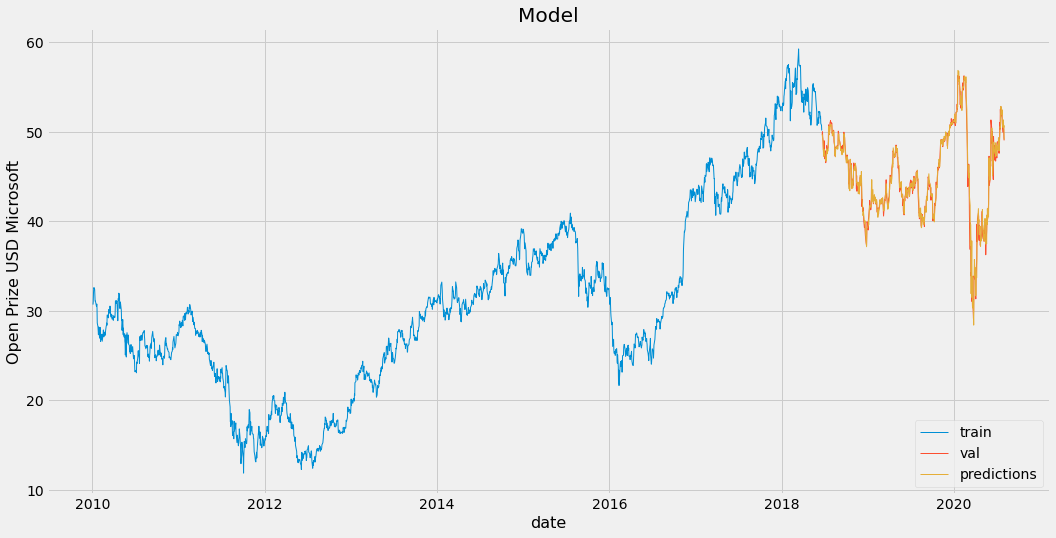

In [20]:
data=df.filter(["Open"])
train=data[:TrainDataLen]
valid=data[TrainDataLen:]
valid["predictions"]=pred
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel("date", fontsize=16)
plt.ylabel("Open Prize USD Microsoft", fontsize=16)
plt.plot(train["Open"],linewidth=1)
plt.plot(valid[["Open", "predictions"]],linewidth=1)
plt.legend(["train", "val", "predictions"], loc="lower right")
plt.show()

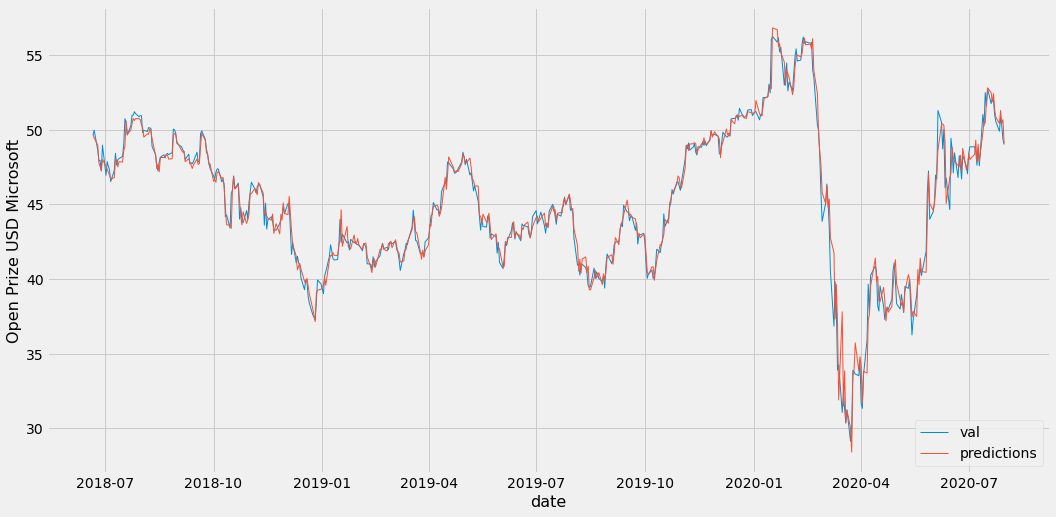

In [21]:
#zoomed in on new data
plt.figure(figsize=(16,8))
plt.ylabel("Open Prize USD Microsoft", fontsize=16)
plt.xlabel("date", fontsize=16)
plt.plot(valid[["Open", "predictions"]],linewidth=1)
plt.legend([ "val", "predictions"], loc="lower right")
plt.show()

In [22]:
valid["dif(%)"]=((valid["Open"]-valid["predictions"])/valid["Open"])*100
valid["difABS(%)"]=abs(valid["dif(%)"])
valid

,Open,predictions,dif(%),difABS(%)
Date,,,,
2018-06-21,49.660000,49.700071,-0.080691,0.080691
2018-06-22,49.980000,49.448641,1.063142,1.063142
2018-06-25,48.650002,48.970968,-0.659747,0.659747
2018-06-26,47.939999,47.802371,0.287083,0.287083
2018-06-27,47.939999,47.554969,0.803150,0.803150
...,...,...,...,...
2020-07-27,49.910000,50.424830,-1.031518,1.031518
2020-07-28,50.830002,51.302046,-0.928672,0.928672
2020-07-29,50.270000,50.449955,-0.357977,0.357977


In [23]:
valid.describe()

,Open,predictions,dif(%),difABS(%)
count,532.000000,532.000000,532.000000,532.000000
mean,45.062011,45.114582,-0.163259,1.161321
std,4.813484,4.714952,2.013685,1.652400
min,29.150000,28.412229,-21.698272,0.003176
25%,41.980000,42.017892,-0.798730,0.309429
50%,44.650002,44.681240,0.012674,0.725170
75%,48.500000,48.411847,0.636523,1.371615
max,56.259998,56.827716,6.894271,21.698272


filtering pre Covid-19 lockdown data

In [24]:
preCovid=valid["2018-06-21":"2020-02-1"] #the date is a point before the big decline
preCovid

,Open,predictions,dif(%),difABS(%)
Date,,,,
2018-06-21,49.660000,49.700071,-0.080691,0.080691
2018-06-22,49.980000,49.448641,1.063142,1.063142
2018-06-25,48.650002,48.970968,-0.659747,0.659747
2018-06-26,47.939999,47.802371,0.287083,0.287083
2018-06-27,47.939999,47.554969,0.803150,0.803150
...,...,...,...,...
2020-01-27,53.000000,54.539265,-2.904274,2.904274
2020-01-28,53.799999,52.976693,1.530309,1.530309
2020-01-29,54.480000,53.982359,0.913437,0.913437


In [25]:
preCovid.describe()

,Open,predictions,dif(%),difABS(%)
count,406.000000,406.000000,406.000000,406.000000
mean,45.389877,45.385494,-0.008815,0.813515
std,3.737247,3.669326,1.124434,0.775235
min,37.279999,37.155479,-5.153497,0.003176
25%,42.452500,42.390179,-0.636948,0.264239
50%,44.600000,44.487918,0.063596,0.611941
75%,48.340000,48.141076,0.605864,1.084975
max,56.259998,56.827716,5.877160,5.877160


# Feedback/Notes version 2
I wanted to predict the open column and used all data for the input, not just the same column <br>
The predictive qualities of the model seem to have worsened with the new data <br>
- with 128 and 50 neurons 10epoches: max error < 21%
- with 128\*2 and 50\*2 neurons 10epoches: max error  <22

Obviously it is especially hard to predict stock pirces when something very unlikely/something noone expected happenes, like a global pandemic.

# Feedback/Notes version 1 (see Github vers)
Apple:
being 3.3%of on average is way to high for a stock environment (apple   code = AAPL, Apple1.h5)

Microsoft: mean dif is better with MS, but a max dif of over 15% is way to huge (Microsoft code=MS, MS1.h5)